In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as stb
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("preparadito.csv", index_col= 0)

In [3]:
df.head(2)

,survey_number,age,gender,country,education_level,programming_experience,programming_language,primary_bd_tool,years_ml,ml_frameworks,ml_algorithms,role,salary,industry,company size,people_in_data,gender_2
0,910,50-54,Man,India,Bachelor’s degree,5-10 years,"Python, R","Local development environments (RStudio, Jupyt...",5-10 years,"Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",Other,"25,000-29,999",Manufacturing/Fabrication,NaN,3-4,Man
1,784,50-54,Man,Indonesia,Master’s degree,20+ years,"SQL, C, C++, Java","Advanced statistical software (SPSS, SAS, etc.)",< 1 year,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Program/Project Manager,"60,000-69,999",Manufacturing/Fabrication,NaN,1-2,Man


# DISTRIBUCIÓN POR GÉNERO

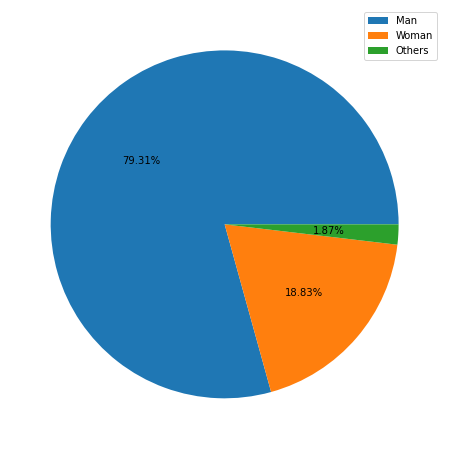

In [4]:
plt.figure(figsize= (8,8))
etiq = df["gender_2"].unique()

a = df["gender_2"].value_counts()
porcentaje = a / df.shape[0] * 100

plt.pie(a, autopct='%1.2f%%')
plt.legend(labels = etiq)
plt.show()

# VISUALIZACIÓN RANGOS DE EDAD 

In [5]:
edad_ordenados = df["age"].sort_values()

Mostramos la gráfica 

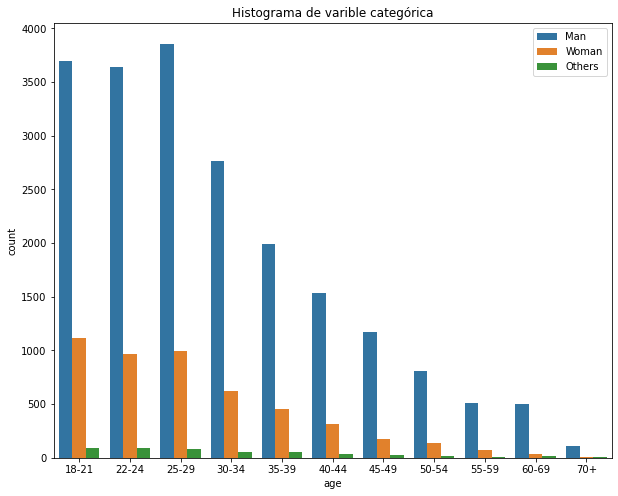

In [6]:
plt.figure(figsize =(10,8)) 
fig = sns.countplot(x=edad_ordenados, data = df, hue = "gender_2") 
#fig.set(xlabel='Isla', ylabel= 'Cuentas' ) 
fig.legend(loc="upper right")
fig.set_title('Histograma de varible categórica') 
plt.show() 

# DISTRIBUCIÓN POR PAÍS, DIVIDIDO POR GÉNERO

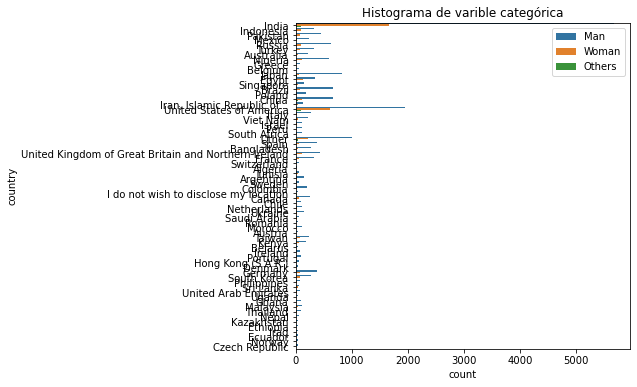

In [7]:
plt.figure(figsize =(6,6)) 
fig = sns.countplot(y="country", data = df, hue = "gender_2") 
#fig.set(xlabel='Isla', ylabel= 'Cuentas' ) 
fig.legend(loc="upper right")
fig.set_title('Histograma de varible categórica') 
plt.show() 

<font color = 'orange'>Esta gráfica no nos sirve porque no es interesante ver los resultados de todos los países. Por eso, vamos a sacar solo los diez primeros

In [8]:
paises_primeros = df.stb.freq(['country'])[0:10]
paises_primeros

paises_10 = df[df["country"].isin(paises_primeros["country"])]
paises_10.head(2)

,survey_number,age,gender,country,education_level,programming_experience,programming_language,primary_bd_tool,years_ml,ml_frameworks,ml_algorithms,role,salary,industry,company size,people_in_data,gender_2
0,910,50-54,Man,India,Bachelor’s degree,5-10 years,"Python, R","Local development environments (RStudio, Jupyt...",5-10 years,"Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",Other,"25,000-29,999",Manufacturing/Fabrication,NaN,3-4,Man
2,924,22-24,Man,Pakistan,Master’s degree,1-3 years,"Python, C++, Java","Basic statistical software (Microsoft Excel, G...",I do not use machine learning methods,NaN,NaN,Software Engineer,$0-999,Academics/Education,NaN,0,Man


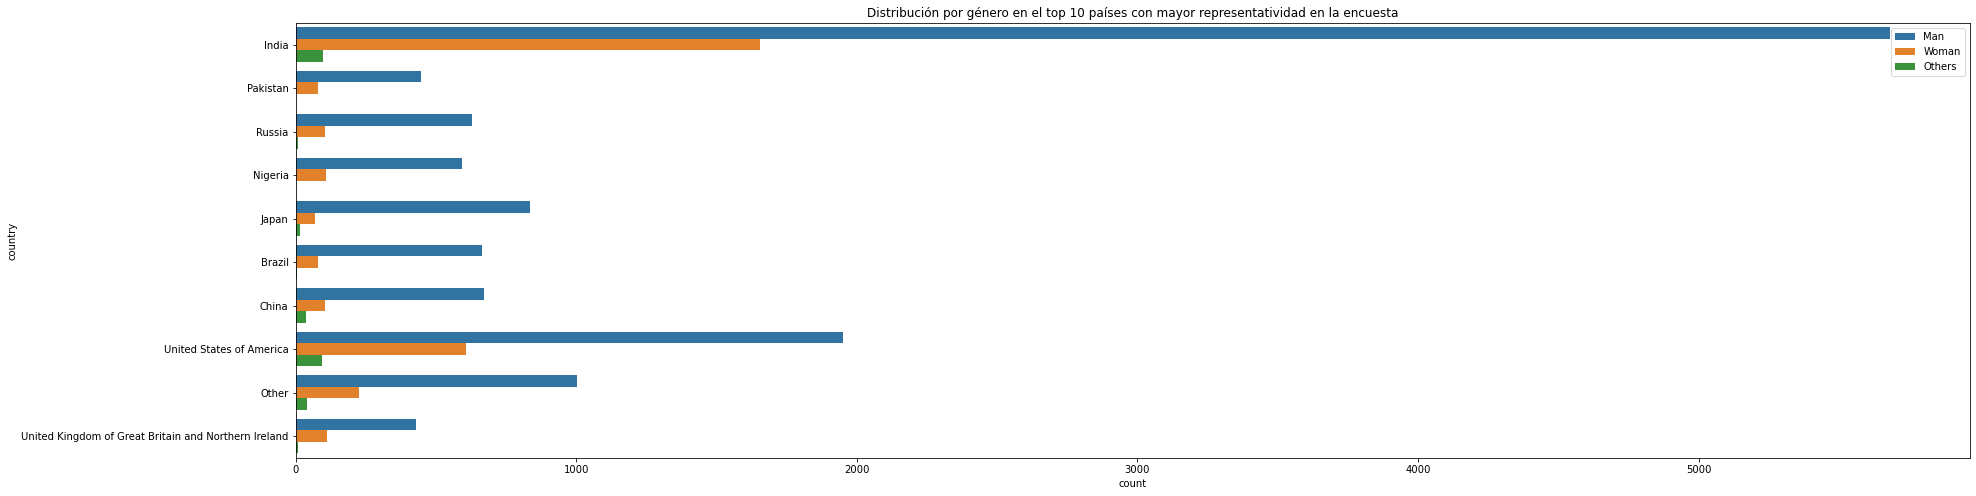

In [9]:
plt.figure(figsize =(30,8)) 
fig = sns.countplot(y= "country", data = paises_10, hue = "gender_2") 
#fig.set(xlabel='Isla', ylabel= 'Cuentas' ) 
fig.legend(loc="upper right")
fig.set_title('Distribución por género en el top 10 países con mayor representatividad en la encuesta')
# plt.xticks(rotation=45) 
plt.show()  

Con esta gráfica podemos ver la distribución por género y país en función del nº de personas que respondieron a la encuesta (India tenía más de 7000 entradas, mientras que el segundo país tiene un tercio de las mismas)

### NIVEL DE EDUCACIÓN EN HOMBRES Y MUJERES ###

In [10]:
df['education_level'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Doctoral degree',
       'I prefer not to answer',
       'Some college/university study without earning a bachelor’s degree',
       'No formal education past high school', 'Professional doctorate'],
      dtype=object)

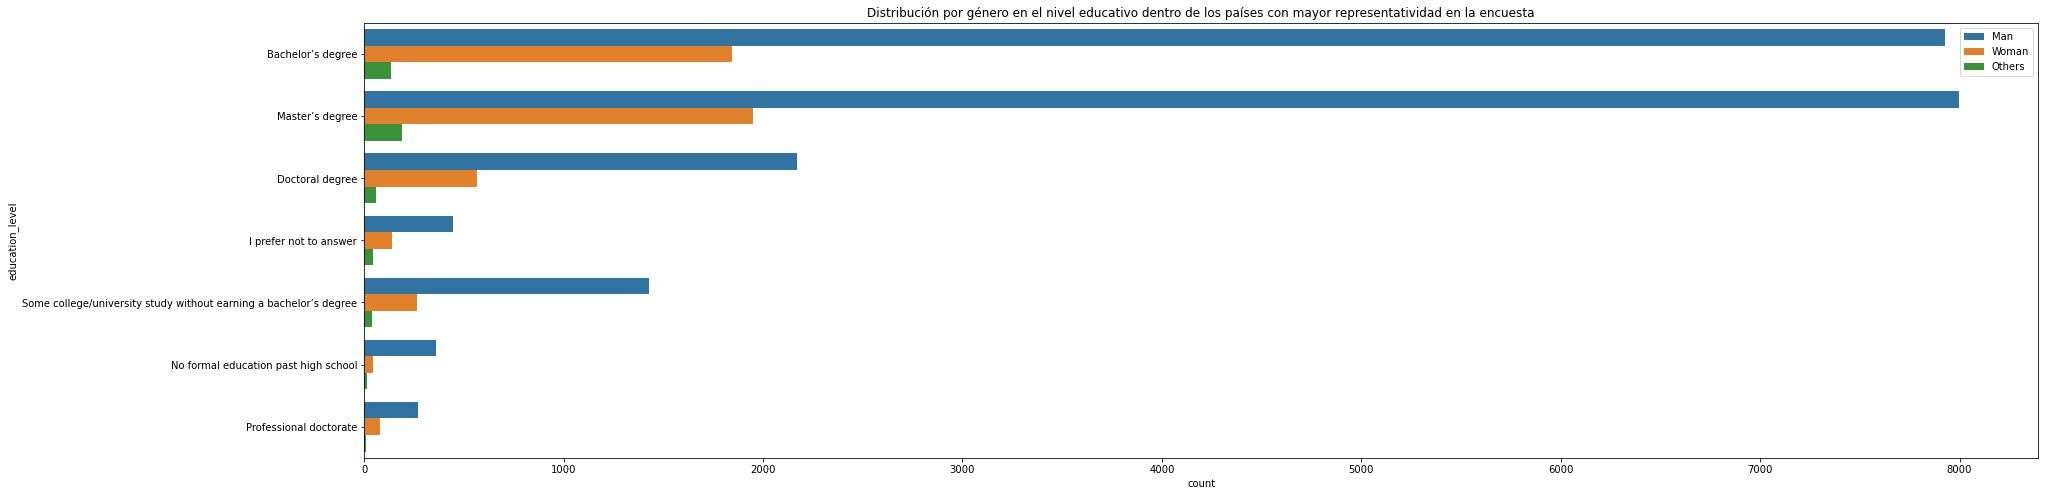

In [11]:
plt.figure(figsize =(30,8)) 
fig = sns.countplot(y= "education_level", data = df, hue = "gender_2") 
fig.legend(loc="upper right")
fig.set_title('Distribución por género en el nivel educativo dentro de los países con mayor representatividad en la encuesta')
plt.show()  

### PAÍSES CON MAYOR % DE MUJERES ###

In [12]:
freq_gender = df.stb.freq(["gender_2",'country'])
freq_gender

,gender_2,country,count,percent,cumulative_count,cumulative_percent
0,Man,India,5681,21.872714,5681,21.872714
1,Man,United States of America,1949,7.503946,7630,29.376660
2,Woman,India,1656,6.375852,9286,35.752512
3,Man,Other,1004,3.865553,10290,39.618065
4,Man,Japan,836,3.218727,11126,42.836792
...,...,...,...,...,...,...
178,Others,Israel,1,0.003850,25969,99.984599
179,Others,Ecuador,1,0.003850,25970,99.988450
180,Others,Belgium,1,0.003850,25971,99.992300
181,Others,Austria,1,0.003850,25972,99.996150


In [13]:
total_pais = df.groupby(['country', 'gender_2']).count()
df_totalpais = pd.DataFrame(total_pais).reset_index()


In [14]:
total_pais

survey_number  age  gender  \
country                  gender_2                               
Algeria                  Man                  32   32      32   
                         Woman                12   12      12   
Argentina                Man                 157  157     157   
                         Others                1    1       1   
                         Woman                24   24      24   
...                                          ...  ...     ...   
United States of America Others               95   95      95   
                         Woman               606  606     606   
Viet Nam                 Man                 224  224     224   
                         Others                1    1       1   
                         Woman                52   52      52   

                                   education_level  programming_experience  \
country                  gender_2                                            
Algeria                  Man                    32                      32   
                         Woman                  12                      12   
Argentina                Man                   157                     157   
                         Others                  1                       1   
                         Woman                  24                      24   
...                                            ...                     ...   
United States of America Others                 95                      95   
                         Woman                 606                     606   
Viet Nam                 Man                   224                     224   
                         Others                  1                       1   
                         Woman                  52                      52   

                                   programming_language  primary_bd_tool  \
country                  gender_2                                          
Algeria                  Man                         28               21   
                         Woman                       12                6   
Argentina                Man                        147              128   
                         Others                       1                1   
                         Woman                       23               14   
...                                                 ...              ...   
United States of America Others                      92               71   
                         Woman                      555              453   
Viet Nam                 Man                        221              143   
                         Others                       1                1   
                         Woman                       44               28   

                                   years_ml  ml_frameworks  ml_algorithms  \
country                  gender_2                                           
Algeria                  Man             25             21             21   
                         Woman           10              9              9   
Argentina                Man            143            116            115   
                         Others           1              0              0   
                         Woman           23             18             17   
...                                     ...            ...            ...   
United States of America Others          90             73             71   
                         Woman          539            403            401   
Viet Nam                 Man            212            179            177   
                         Others           1              1              1   
                         Woman           39             28             28   

                                   role  salary  industry  company size  \
country                  gender_2                                         
Algeria                  Man     

<font color = 'orange'> ¿Quizás podemos sacar los porcentajes a través de survey_number? 

In [15]:
def porcentaje(col):
    x = col / total_pais * 100 
    return x
    

In [16]:
total_pais['porcentaje_pais'] = total_pais['gender_2'].apply(porcentaje)

# ESTO ES LO QUE ESTAMOS HACIENDO. NOS FALTA SACAR % 


KeyError: 'gender_2'

### INDUSTRIAS CON MÁS FRECUENCIA ###

Vemos qué industrias tienen más frecuencia

 - Pie de industrias con mayor frecuencia

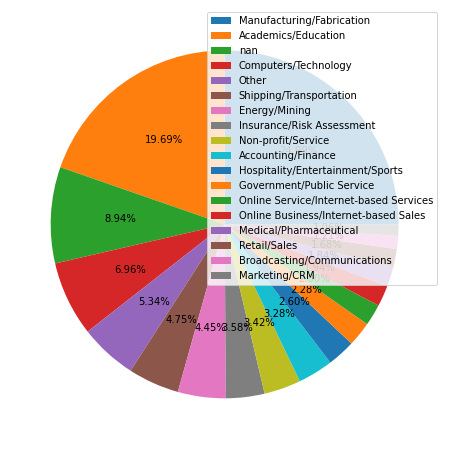

In [ ]:
plt.figure(figsize= (8,8))
etiq = df["industry"].unique()

a = df["industry"].value_counts()
porcentaje = a / df.shape[0] * 100

plt.pie(a, autopct='%1.2f%%')
plt.legend(labels = etiq, loc= 'upper right')
plt.show()

<font color = 'orange'> He intentado mover la leyenda, pero sigue apareciendo encima de la gráfica porque es muy pequeña. Al hacerlo de 20x20 sale apartada, pero quizás es demasiado grande.

 - Diagrama de barras para industrias con mayor frecuencia

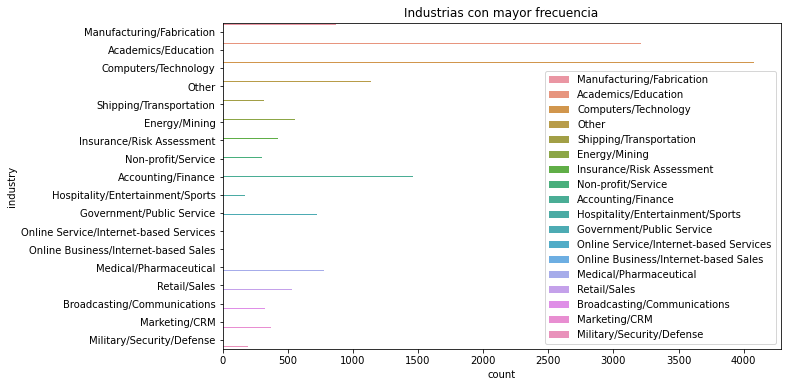

In [ ]:
plt.figure(figsize =(10,6)) 
fig = sns.countplot(y=df['industry'], data = df, hue = "industry") 
fig.legend(loc="lower right")
fig.set_title('Industrias con mayor frecuencia') 
plt.show() 

<font color = 'orange'> ¿Quizás podemos hacerlo con unas barras que sean más anchas? Así se ve un poco regular.